In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/rating_features.csv')
df_price = pd.read_csv('/content/rental_price.csv')

In [ ]:
df.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,114.059600,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,114.043225,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079426,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079035,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,114.055590,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt


In [ ]:
#checking the null values
df.isna().sum()

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                           46
bed_type                             0
bedrooms                             6
beds                                23
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   15
host_listings_count                 15
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             2057
review_scores_communication       2057
review_scores_location            2056
review_scores_rating              2046
review_scores_value               2057
room_type                            0
dtype: int64

In [ ]:
# fill na : bedrooms = 0
df['bedrooms'] = df['bedrooms'].fillna(0)

In [ ]:

# fill na : beds = 0
df['beds'] = df['beds'].fillna(0)

In [ ]:
# fill na : host_listings_count = 0
df['host_listings_count'] = df['host_listings_count'].fillna(0)

In [ ]:
# fill na : host_is_superhost = 'none'
df['host_is_superhost'] = df['host_is_superhost'].fillna('none')

In [ ]:

# fill na : review_scores_checkin = mean
df['review_scores_checkin'] = df['review_scores_checkin'].fillna(int(df['review_scores_checkin'].mean()))

In [ ]:

# fill na : review_scores_communication = mean
df['review_scores_communication'] = df['review_scores_communication'].fillna(int(df['review_scores_communication'].mean()))

In [ ]:
# fill na : review_scores_location = mean
df['review_scores_location'] = df['review_scores_location'].fillna(int(df['review_scores_location'].mean()))

In [ ]:
# fill na : review_scores_rating = mean
df['review_scores_rating'] = df['review_scores_rating'].fillna(int(df['review_scores_rating'].mean()))

In [ ]:
# fill na : review_scores_value = mean
df['review_scores_value'] = df['review_scores_value'].fillna(int(df['review_scores_value'].mean()))

In [ ]:
df.isna().sum()

accommodates                       0
amenities                          0
availability_30                    0
bathrooms                         46
bed_type                           0
bedrooms                           0
beds                               0
calculated_host_listings_count     0
cancellation_policy                0
guests_included                    0
has_availability                   0
host_is_superhost                  0
host_listings_count                0
instant_bookable                   0
latitude(North)                    0
longitude(East)                    0
maximum_nights                     0
number_of_reviews                  0
property_type                      0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_rating               0
review_scores_value                0
room_type                          0
dtype: int64

In [ ]:
df.describe()

,accommodates,availability_30,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,host_listings_count,latitude(North),longitude(East),maximum_nights,number_of_reviews,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
count,5834.000000,5834.000000,5788.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000
mean,4.388584,16.521083,1.479699,1.737230,2.203805,1.901097,1.880699,11.737916,22.610686,114.192840,746.705862,10.796366,9.537881,9.543195,9.303222,95.282139,9.269626
std,2.689105,12.322443,0.774671,1.137411,1.653650,2.282242,1.773520,55.094922,0.047957,0.042389,641.901800,25.407450,0.596884,0.605367,0.707119,5.854244,0.745393
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,22.470593,113.936585,1.000000,0.000000,2.000000,2.000000,4.000000,20.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.583001,114.173795,30.000000,0.000000,9.000000,9.000000,9.000000,95.000000,9.000000
50%,4.000000,20.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,22.600510,114.196540,1125.000000,2.000000,10.000000,10.000000,9.000000,95.000000,9.000000
75%,6.000000,29.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,22.631677,114.218806,1125.000000,9.000000,10.000000,10.000000,10.000000,100.000000,10.000000
max,16.000000,30.000000,8.000000,10.000000,16.000000,17.000000,16.000000,339.000000,22.838904,114.376861,26801.000000,314.000000,10.000000,10.000000,10.000000,100.000000,10.000000


In [ ]:
print(len(df.columns))
print(df.columns)

25
Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'cancellation_policy', 'guests_included', 'has_availability',
       'host_is_superhost', 'host_listings_count', 'instant_bookable',
       'latitude(North)', 'longitude(East)', 'maximum_nights',
       'number_of_reviews', 'property_type', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type'],
      dtype='object')


In [ ]:
df.dtypes

accommodates                        int64
amenities                          object
availability_30                     int64
bathrooms                         float64
bed_type                           object
bedrooms                          float64
beds                              float64
calculated_host_listings_count      int64
cancellation_policy                object
guests_included                     int64
has_availability                   object
host_is_superhost                  object
host_listings_count               float64
instant_bookable                   object
latitude(North)                   float64
longitude(East)                   float64
maximum_nights                      int64
number_of_reviews                   int64
property_type                      object
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_rating              float64
review_scores_value               

In [ ]:
for col in list(df.select_dtypes(['object']).columns):
    print(col)
    print(len(df[col].unique()))
    print(df[col].unique())
    print('')

amenities
4473
['{"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets live on this property",Dog(s),"Other pet(s)","Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials}'
 '{"Air Conditioning",Heating,"Family/Kid Friendly","Smoke Detector","First Aid Kit","Fire Extinguisher"}'
 '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Pool,Kitchen,"Free Parking on Premises","Indoor Fireplace",Heating,Washer,Dryer,"Smoke Detector","Safety Card","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door"}'
 ...
 '{TV,"Air Conditioning",Pool,Kitchen,Gym,"Elevator in Building",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}'
 '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed",Heating,"Family/Kid Friendly","Smoke Detector",Essentials,Shampoo}'
 '{TV,"Cable TV","Wireless Interne

In [ ]:

#checking df_price
df_price.head()

,price
0,$300.00
1,$99.00
2,$100.00
3,$100.00
4,$599.00


In [ ]:
df_price.dtypes

price    object
dtype: object

In [ ]:
len(df_price)

5834

In [ ]:
df_price.isna().sum()

price    0
dtype: int64

In [ ]:
#replace $ sign
df_price['price'] = df_price['price'].str.replace('$','')
#replace , sign
df_price['price'] = df_price['price'].str.replace(',','')

<ipython-input-188-c6c4ae5ca60d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_price['price'] = df_price['price'].str.replace('$','')


In [ ]:
#change type to float
df_price['price'] = pd.to_numeric(df_price['price'])

In [ ]:
df_price.dtypes

price    float64
dtype: object

In [ ]:
#Extract amenities
features_key = set()
def extract_feature(x):
    s1 = x.replace('{', '').replace('}', '').replace('"', '')
    s1 = s1.split(',')
    for s in s1:
        features_key.add(s)
        #print(s)

df['amenities'].apply(extract_feature)

0       None
1       None
2       None
3       None
4       None
        ... 
5829    None
5830    None
5831    None
5832    None
5833    None
Name: amenities, Length: 5834, dtype: object

In [ ]:
features_key

{'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'}

In [ ]:
features_key.remove('')

In [ ]:
for feat in features_key:
    df['amenities__'+feat.replace(' ','_')] = df['amenities'].str.contains(feat).astype(int)

<ipython-input-194-03a5194d3983>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities__'+feat.replace(' ','_')] = df['amenities'].str.contains(feat).astype(int)
<ipython-input-194-03a5194d3983>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities__'+feat.replace(' ','_')] = df['amenities'].str.contains(feat).astype(int)
<ipython-input-194-03a5194d3983>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities__'+feat.replace(' ','_')] = df['amenities'].str.contains(feat).astype(int)


In [ ]:
df.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'cancellation_policy', 'guests_included', 'has_availability',
       'host_is_superhost', 'host_listings_count', 'instant_bookable',
       'latitude(North)', 'longitude(East)', 'maximum_nights',
       'number_of_reviews', 'property_type', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type',
       'amenities__Suitable_for_Events', 'amenities__Essentials',
       'amenities__First_Aid_Kit', 'amenities__Laptop_Friendly_Workspace',
       'amenities__Wheelchair_Accessible', 'amenities__Hot_Tub',
       'amenities__Washer', 'amenities__Free_Parking_on_Premises',
       'amenities__Indoor_Fireplace', 'amenities__Carbon_Monoxide_Detector',
       'amenities__Breakfast', 'amenities__Cat(s)', 'amenities__Hangers',
       'amenities__Heating', 'a

In [ ]:
df.head(3).T

,0,1,2
accommodates,6,2,2
amenities,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...","{""Air Conditioning"",Heating,""Family/Kid Friend...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
availability_30,0,29,30
bathrooms,2.5,0.0,1.5
bed_type,Real Bed,Futon,Real Bed
...,...,...,...
amenities__Doorman,0,0,0
amenities__Lock_on_Bedroom_Door,0,0,1
amenities__Smoke_Detector,1,1,1
amenities__Washer_/_Dryer,0,0,0


In [ ]:
#Convert dtypes object to label encoder
df.select_dtypes(['object']).columns

Index(['amenities', 'bed_type', 'cancellation_policy', 'has_availability',
       'host_is_superhost', 'instant_bookable', 'property_type', 'room_type'],
      dtype='object')

In [ ]:
col_object = ['bed_type', 'cancellation_policy', 'has_availability',
       'host_is_superhost', 'instant_bookable', 'property_type', 'room_type']

for col in col_object:
    lbl_enc = LabelEncoder()
    dflbl = lbl_enc.fit_transform(df[col])
    df['lbl_' + col] = dflbl.reshape(-1,1)
    #break 

In [ ]:
df.dtypes

accommodates               int64
amenities                 object
availability_30            int64
bathrooms                float64
bed_type                  object
                          ...   
lbl_has_availability       int64
lbl_host_is_superhost      int64
lbl_instant_bookable       int64
lbl_property_type          int64
lbl_room_type              int64
Length: 73, dtype: object

In [ ]:
#Merge df_price to df
df = pd.concat([df.reset_index(), df_price.reset_index()], axis=1)

In [ ]:
df[df['price']==0]

,index,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,...,amenities__Fire_Extinguisher,lbl_bed_type,lbl_cancellation_policy,lbl_has_availability,lbl_host_is_superhost,lbl_instant_bookable,lbl_property_type,lbl_room_type,index,price
903,903,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,1.0,Real Bed,1.0,1.0,1,moderate,...,1,4,1,0,0,0,0,1,903,0.0


In [ ]:
#drop row with price = 0
df = df.drop(df[df['price']==0].index, axis=0)

In [ ]:
import seaborn as sns

In [ ]:
df_property_type = df['property_type'].value_counts().reset_index()

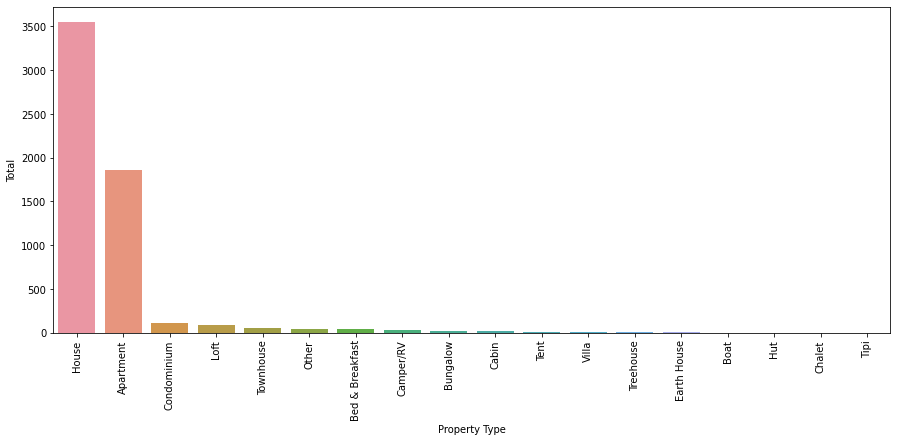

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.barplot(data=df_property_type, x='index', y='property_type')
plt.xlabel("Property Type")
plt.ylabel("Total")
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
df_property_type.iloc[2] = df_property_type.iloc[2:].sum()
df_property_type = df_property_type.iloc[:2+1]

In [ ]:
df_property_type['index'][2] = 'Others'

<ipython-input-208-0cbce43958d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_type['index'][2] = 'Others'


In [ ]:
df_property_type

,index,property_type
0,House,3549
1,Apartment,1854
2,Others,430


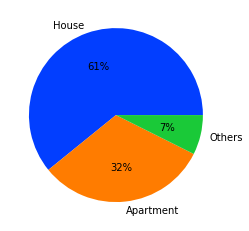

In [ ]:
palette_color = sns.color_palette('bright')
plt.pie(df_property_type['property_type'], labels=df_property_type['index'], colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
df_instant_bookable = df['instant_bookable'].value_counts().reset_index()

In [ ]:
df_instant_bookable

,index,instant_bookable
0,f,5311
1,t,522


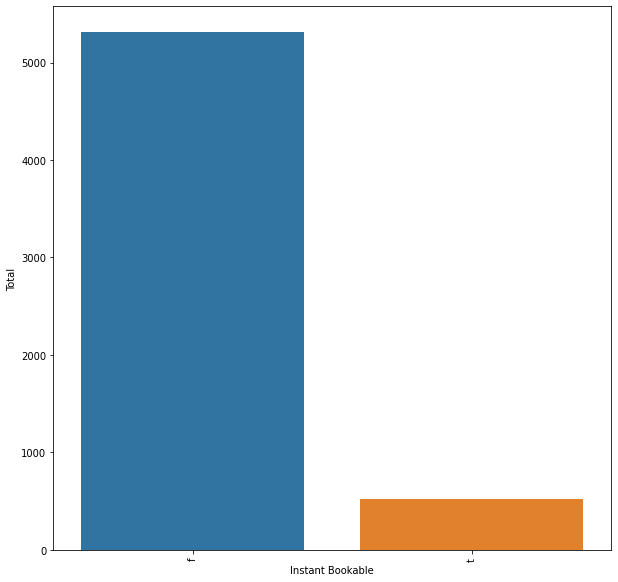

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(data=df_instant_bookable, x='index', y='instant_bookable')
plt.xlabel("Instant Bookable")
plt.ylabel("Total")
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
df.groupby(['bedrooms'])['price'].mean()

bedrooms
0.0      166.113360
1.0      138.867470
2.0      299.999221
3.0      495.755932
4.0      765.073718
5.0     1072.337838
6.0     1806.583333
7.0     1107.666667
8.0     2234.800000
10.0    1273.500000
Name: price, dtype: float64

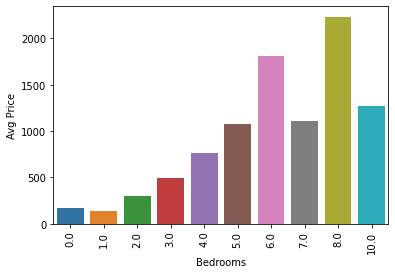

In [ ]:
ax = sns.barplot(data=df.groupby(['bedrooms'])['price'].mean().reset_index(), x='bedrooms', y='price')
plt.xlabel("Bedrooms")
plt.ylabel("Avg Price")
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
df['review_scores_communication'].unique()

array([10.,  9.,  8.,  6.,  4.,  2.,  7.])

<Axes: xlabel='review_scores_communication', ylabel='Count'>

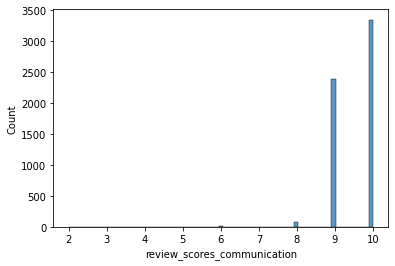

In [ ]:
sns.histplot(df['review_scores_communication'])

In [ ]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = 0.1

    self.no_of_iterations = 100

    self.lambda_parameter = 0.1


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()


  # function for updating the weight & bias value
  def update_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
def mean_squared_error(Y_true, Y_pred):
    # Compute the mean squared error between Y_true and Y_pred
    mse = np.mean((Y_true - Y_pred)**2)
    return mse

In [ ]:
def r2_score(y_true, y_pred):
    '''
    Calculate R2 score from scratch.
    
    Parameters:
        y_true (array-like): true y values.
        y_pred (array-like): predicted y values.
        
    Returns:
        r2_score (float): R2 score.
    '''
    import numpy as np
    
    # Calculate the mean of the dependent variable y
    y_mean = np.mean(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_mean)**2)
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred)**2)
    
    # Calculate R2 score
    r2_score = 1 - (rss / tss)
    
    return r2_score

In [ ]:
#define the parameters
param = {
    "lamda" : 0.1,
    "learning_rate" : 0.1,
    "iteration" : 100
}
print("="*100)
linear_reg = LassoRegression(**param)

# Train the model.
linear_reg.train(X, y) 

# Predict the values.
y_pred = linear_reg.predict(X)
#Root mean square error.
score = r2_score(y, y_pred)
print("The r2_score of the trained model", score)
# mse of test and pred 
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)

The Cost function for the iteration 10----->1577.093931812827 :)
The Cost function for the iteration 20----->222.91216477270254 :)
The Cost function for the iteration 30----->56.64858271223108 :)
The Cost function for the iteration 40----->36.23379710306502 :)
The Cost function for the iteration 50----->33.726684096696815 :)
The Cost function for the iteration 60----->33.41864667532714 :)
The Cost function for the iteration 70----->33.38074223003724 :)
The Cost function for the iteration 80----->33.3760538036789 :)
The Cost function for the iteration 90----->33.37546380742714 :)
The Cost function for the iteration 100----->33.37538548814968 :)
The r2_score of the trained model 0.9999959761195488
Mean squared error: 0.08234505114838808


In [ ]:
# Import necessary modules
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate a Lasso regression model
lasso_reg = Lasso(alpha=0.1)

In [ ]:

# Fit the model on the training data
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:

# Predict the target values for the test data
y_pred = lasso_reg.predict(X_test)

In [ ]:
# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.0803005775628027


In [ ]:
#Root mean square error.
score = r2_score(y_test, y_pred)
print("The r2_score of the trained model", score)

The r2_score of the trained model 0.9999960815299104
